In [15]:
# impor librari
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

Memuat Dataset

In [16]:
# Memuat Dataset
data = pd.read_csv('bank-full.csv', delimiter=';')

Menampilkan informasi dataset

In [17]:
# Menampilkan 5 baris pertama dari dataset
print("Dataset Head:")
print(data.head())

# Memeriksa tipe data
print("\nTipe Data:")
print(data.dtypes)

# Memeriksa ukuran dataset
print("\nUkuran Dataset:")
print(data.shape)

Dataset Head:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Tipe Data:
age           int64
job          object
marital      object
education    object
defau

Memilih kolom yang relevan untuk analisis lebih lanjut

In [18]:
# Memilih kolom yang dibutuhkan
columns_needed = ['age', 'job', 'marital', 'education', 'default', 'balance',
                  'housing', 'loan', 'contact', 'day', 'month', 'duration',
                  'campaign', 'pdays', 'previous', 'poutcome', 'y']
data = data[columns_needed]

Penanganan missing value

In [19]:
# Menangani Missing Value
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Melakukan label encoding untuk mengubah kolom kategorikal menjadi numerik

In [20]:
# Encoding Kolom Kategorikal menggunakan Label Encoding
label_encoder = LabelEncoder()

# Encoding untuk kolom 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', month
data['job'] = label_encoder.fit_transform(data['job'])
data['marital'] = label_encoder.fit_transform(data['marital'])
data['education'] = label_encoder.fit_transform(data['education'])
data['default'] = label_encoder.fit_transform(data['default'])
data['housing'] = label_encoder.fit_transform(data['housing'])
data['loan'] = label_encoder.fit_transform(data['loan'])
data['contact'] = label_encoder.fit_transform(data['contact'])
data['month'] = label_encoder.fit_transform(data['month'])
data['poutcome'] = label_encoder.fit_transform(data['poutcome'])
data['y'] = label_encoder.fit_transform(data['y'])

# Memeriksa tipe data setelah encoding
print("\nTipe Data Setelah Encoding:")
print(data.dtypes)


Tipe Data Setelah Encoding:
age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
y            int64
dtype: object


Normalisasi terhadap kolom numerik

In [22]:
# Fitur numerik yang perlu dinormalisasi
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Membuat instance dari MinMaxScaler
scaler = MinMaxScaler()

# Melakukan normalisasi pada fitur numerik
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Menampilkan 5 baris pertama setelah normalisasi
print("\nDataset Setelah Normalisasi:")
print(data.head())


Dataset Setelah Normalisasi:
        age  job  marital  education  default   balance  housing  loan  \
0  0.519481    4        1          2        0  0.092259        1     0   
1  0.337662    9        2          1        0  0.073067        1     0   
2  0.194805    2        1          1        0  0.072822        1     1   
3  0.376623    1        1          3        0  0.086476        1     0   
4  0.194805   11        2          3        0  0.072812        0     0   

   contact  day  month  duration  campaign  pdays  previous  poutcome  y  
0        2    5      8  0.053070       0.0    0.0       0.0         3  0  
1        2    5      8  0.030704       0.0    0.0       0.0         3  0  
2        2    5      8  0.015453       0.0    0.0       0.0         3  0  
3        2    5      8  0.018707       0.0    0.0       0.0         3  0  
4        2    5      8  0.040260       0.0    0.0       0.0         3  0  


Menampilkan statistik deskriptif dari dataset

In [23]:
# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(data.describe())


Statistik Deskriptif:
                age           job       marital     education       default  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean       0.297873      4.339762      1.167725      1.224813      0.018027   
std        0.137906      3.272657      0.608230      0.747997      0.133049   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.194805      1.000000      1.000000      1.000000      0.000000   
50%        0.272727      4.000000      1.000000      1.000000      0.000000   
75%        0.389610      7.000000      2.000000      2.000000      0.000000   
max        1.000000     11.000000      2.000000      3.000000      1.000000   

            balance       housing          loan       contact           day  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean       0.085171      0.555838      0.160226      0.640242     15.806419   
std        0.027643      0.4

Visualisasi Data

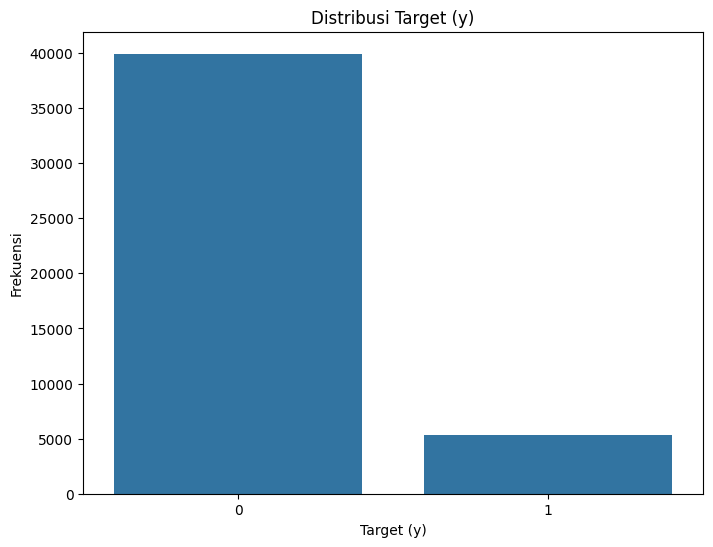

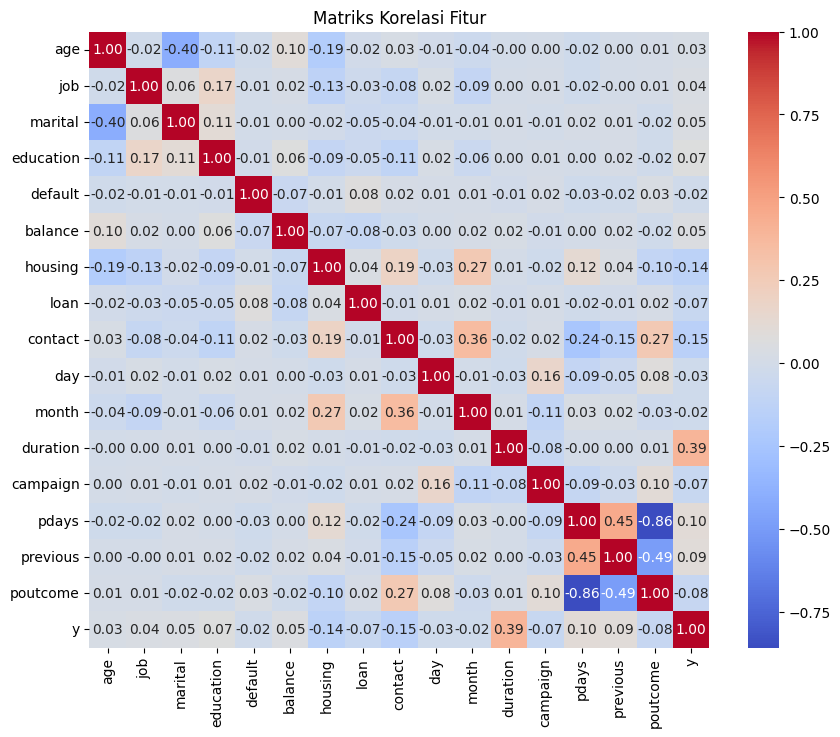

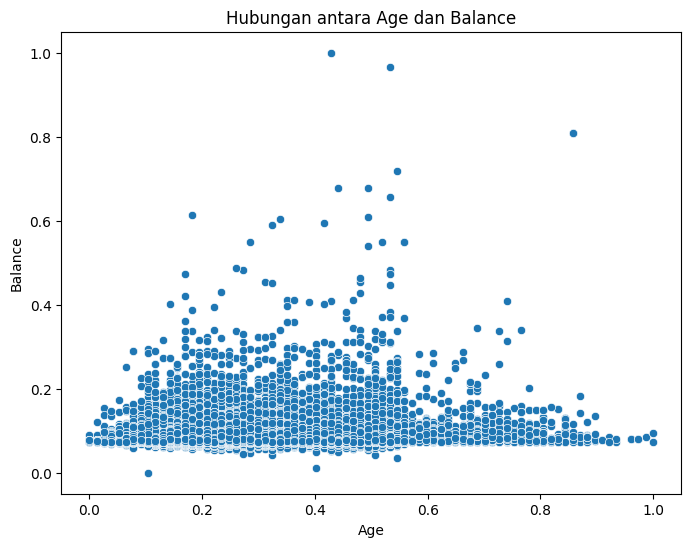

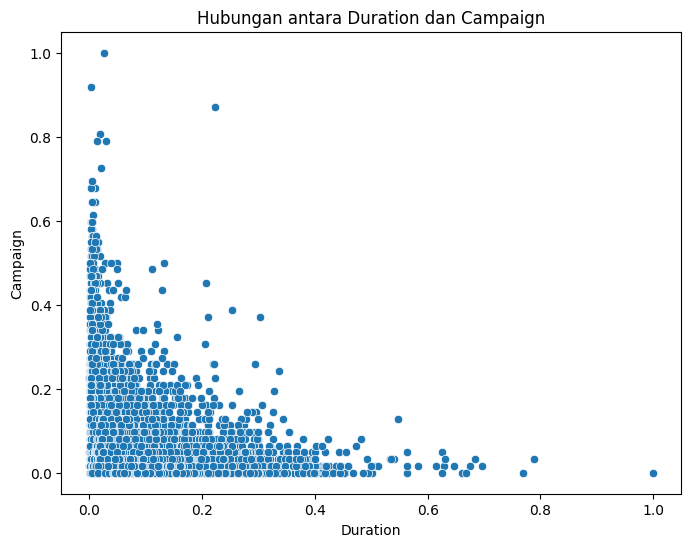

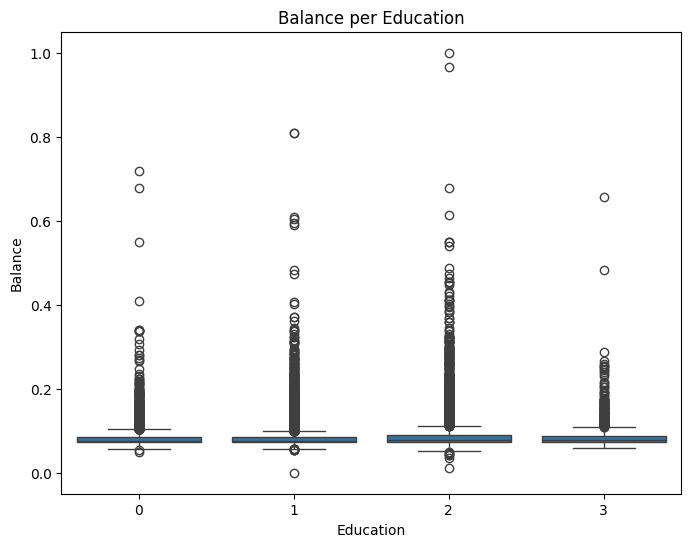

In [24]:
# Visualisasi Data

# Visualisasi distribusi target (y)
plt.figure(figsize=(8, 6))
sns.countplot(x=data['y'])
plt.title('Distribusi Target (y)')
plt.xlabel('Target (y)')
plt.ylabel('Frekuensi')
plt.show()

# Korelasi antar fitur numerik
correlation_matrix = data.corr()

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Fitur')
plt.show()

# Visualisasi hubungan antara umur (age) dan saldo rekening (balance)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['age'], y=data['balance'])
plt.title('Hubungan antara Age dan Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

# Visualisasi hubungan antara durasi (duration) dan jumlah kampanye (campaign)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['duration'], y=data['campaign'])
plt.title('Hubungan antara Duration dan Campaign')
plt.xlabel('Duration')
plt.ylabel('Campaign')
plt.show()

# Visualisasi saldo rekening per pendidikan
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['education'], y=data['balance'])
plt.title('Balance per Education')
plt.xlabel('Education')
plt.ylabel('Balance')
plt.show()

Menyimpan dataset yang sudah dibersihkan

In [25]:
# Menyimpan dataset yang telah diproses
data.to_csv('bankpreprocessed_data.csv', index=False)

# Menampilkan pesan konfirmasi bahwa file telah disimpan
print("\nData telah disimpan ke 'bankpreprocessed_data.csv'.")


Data telah disimpan ke 'bankpreprocessed_data.csv'.
